In [326]:
import sys, os
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data_directory = '/Users/user/Projects/allee_effect/data'

def findVals(path, df=None):
    dfStart = 'Results'
    dfDate = ''
    dfTime = ''
    with open(path, 'rt', encoding = 'utf-8', errors='replace') as f:
        if df is None:
            for num, line in enumerate(f, 1):
                if dfStart in line:
                    return num
        for line in f:
            if 'Date' in line:
                dfDate = line.split('\t')[-1].strip('\n')
            if 'Time' in line:
                dfTime = line.split('\t')[-1].strip('\n')
                    
    dT = ', '.join((dfDate, dfTime))
    return dT

def addMultiIndex(df, dT):
    tempDf = df.copy()
    tempColumns = tempDf.columns
    newColumns = []
    
    for i in tempColumns:
        if i <= 6:
            newColumns.append((dT, 'MR', i))
        elif i > 6:
            newColumns.append((dT, 'MVF', i))
            
    return newColumns
    
def elapsedTime(dT):
    dateTimeObj = []
    elapsedTime = []
    for timePoint in dT:
        tempDt = datetime.strptime(timePoint, '%m/%d/%Y, %I:%M:%S %p')
        dateTimeObj.append(tempDt)
        
    zeroPoint = min(dateTimeObj)
    
    for i in range(len(dateTimeObj)):
        elapsed = round((((dateTimeObj[i] - zeroPoint).total_seconds())/3600), 2)
        elapsedTime.append((dT[i], elapsed))
    
    return elapsedTime
    
def preprocess(data_directory):
    reads_dfs = []
    dateAndTime = []

    for dirName, subdirList, fileList in os.walk(data_directory):
        for fname in fileList:
            extension = fname.split('.')[-1]
            if extension == 'txt':
                path = os.path.join(data_directory, fname)

                df = pd.read_csv(path, skiprows=findVals(path), sep='\t', header=0, index_col=0)
                df.columns = (range(1, df.shape[1]+1))
                df = df.drop(df.columns[-1], axis=1)

                dfDateTime = findVals(path, df)
                dateAndTime.append(dfDateTime)

                df.columns = pd.MultiIndex.from_tuples(addMultiIndex(df, dfDateTime))
                reads_dfs.append(df)

    odVals = pd.concat(reads_dfs, axis=1)
    
    return odVals, dateAndTime

In [327]:
odVals, dateAndTime = preprocess(data_directory)
elapsedTimes = elapsedTime(dateAndTime)

In [328]:
elapsedTimes

[('8/8/2019, 4:50:59 PM', 52.05),
 ('8/9/2019, 9:52:50 AM', 69.08),
 ('8/8/2019, 9:40:03 AM', 44.86),
 ('8/7/2019, 5:04:39 PM', 28.27),
 ('8/7/2019, 10:17:30 AM', 21.49),
 ('8/6/2019, 12:48:16 PM', 0.0)]

In [341]:
def plotDilution(df, times, row, strain):
    x = []
    y = []

    for t in elapsedTimes:
        x.append(t[-1])
        y.append(odVals.loc['A',(t[0], 'MR', 1)])
        
    order = np.argsort(x)
    x = np.array(x)[order]
    y = np.array(y)[order]
    
    dilutionDF = []
    
    
    return xs, ys


xs, ys = plotDilution(odVals, elapsedTimes, 'A', 'MR')
        
xs, ys
# plt.plot(xs, ys)
# plt.show()

(array([ 0.  , 21.49, 28.27, 44.86, 52.05, 69.08]),
 array([0.256, 0.35 , 0.379, 0.347, 0.358, 0.352]))

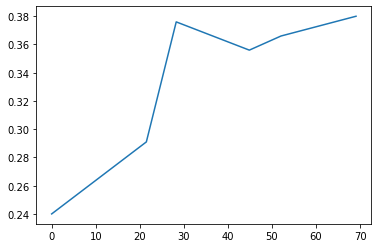

In [337]:
y = odVals.loc['A',(slice(None), 'MR', 1)]
y

8/8/2019, 4:50:59 PM   MR  1    0.358
8/9/2019, 9:52:50 AM   MR  1    0.352
8/8/2019, 9:40:03 AM   MR  1    0.347
8/7/2019, 5:04:39 PM   MR  1    0.379
8/7/2019, 10:17:30 AM  MR  1    0.350
8/6/2019, 12:48:16 PM  MR  1    0.256
Name: A, dtype: float64

In [338]:
odVals

8/8/2019, 4:50:59 PM                                                   \
                    MR                                       MVF          
                    1      2      3      4      5      6      7      8    
A                0.358  0.372  0.331  0.366  0.359  0.375  0.350  0.338   
B                0.319  0.316  0.349  0.355  0.376  0.359  0.317  0.315   
C                0.205  0.178  0.173  0.151  0.162  0.200  0.153  0.144   
D                0.097  0.102  0.163  0.118  0.120  0.117  0.157  0.122   
E                0.090  0.092  0.107  0.107  0.106  0.112  0.116  0.113   
F                0.086  0.091  0.100  0.101  0.102  0.109  0.102  0.108   
G                0.249  0.098  0.117  0.110  0.101  0.095  0.098  0.098   
H                0.174  0.218  0.086  0.193  0.089  0.087  0.089  0.087   

                 ... 8/6/2019, 12:48:16 PM                                     \
                 ...                    MR                         MVF          
      9      10  ...                    3      4      5      6      7      8    
A  0.359  0.336  ...                 0.251  0.240  0.249  0.221  0.198  0.228   
B  0.379  0.304  ...                 0.201  0.198  0.184  0.176  0.145  0.169   
C  0.159  0.143  ...                 0.168  0.158  0.165  0.140  0.124  0.101   
D  0.128  0.113  ...                 0.143  0.150  0.145  0.124  0.145  0.095   
E  0.108  0.118  ...                 0.133  0.137  0.127  0.128  0.085  0.084   
F  0.107  0.105  ...                 0.131  0.131  0.123  0.129  0.123  0.129   
G  0.097  0.083  ...                 0.120  0.123  0.121  0.123  0.122  0.121   
H  0.110  0.109  ...                 0.108  0.115  0.110  0.115  0.113  0.110   

                               
                               
      9      10     11     12  
A  0.260  0.279  0.252  0.251  
B  0.214  0.206  0.210  0.249  
C  0.159  0.169  0.162  0.172  
D  0.163  0.143  0.145  0.145  
E  0.144  0.134  0.128  0.139  
F  0.135  0.124  0.125  0.127  
G  0.123  0.115  0.128  0.121  
H  0.110  0.117  0.117  0.107  

[8 rows x 72 columns]